In [1]:
## REQUIRED LIBRARIES
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the_office_series.csv dataset and parse the date
office_df = pd.read_csv('the_office_series.csv')
#Print a concise summary of the dataframe
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [3]:
#for changing index value from 1
#office_df.shift()[1:]

In [4]:
#change the column index one from 'Unnamed: 0' to 'EpisodeNumbers' 
office_df = office_df.rename(columns = {'Unnamed: 0': 'EpisodeNumbers'})
office_df

,EpisodeNumbers,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels
...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester


In [5]:
#Convert the Data Type of Date column to datetime64 for numerical analysis
office_df['Date'] = pd.to_datetime(office_df['Date'])
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EpisodeNumbers  188 non-null    int64         
 1   Season          188 non-null    int64         
 2   EpisodeTitle    188 non-null    object        
 3   About           188 non-null    object        
 4   Ratings         188 non-null    float64       
 5   Votes           188 non-null    int64         
 6   Viewership      188 non-null    float64       
 7   Duration        188 non-null    int64         
 8   Date            188 non-null    datetime64[ns]
 9   GuestStars      29 non-null     object        
 10  Director        188 non-null    object        
 11  Writers         188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 17.8+ KB


In [6]:
#creating a column named "year"
office_df['year'] = office_df['Date'].dt.year
office_df
 

,EpisodeNumbers,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,year
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,2005
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,2005
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,2005
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,2005
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,2013-04-11,NaN,Matt Sohn,Dan Sterling,2013
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,2013-04-25,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2013-05-02,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,2013
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,2013-05-09,NaN,David Rogers,Brent Forrester,2013


In [7]:
# Scaling Rating column
def scaleFunc(col):
    minVal = min(col)
    maxVal = max(col)
    return [*map(lambda x: (x - minVal)/(maxVal - minVal), col)]

#call normalize Function
office_df['ScaledRating'] = scaleFunc(office_df['Ratings'])

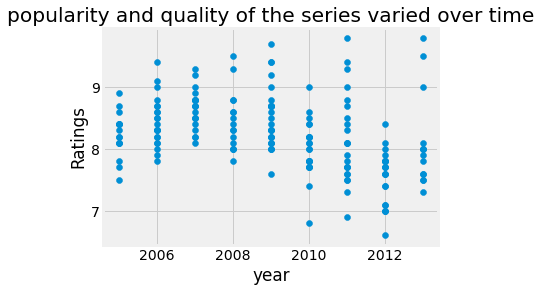

In [8]:
fig = plt.figure()
#Style of Plot
plt.style.use('fivethirtyeight')

plt.scatter(x = office_df['year'],
            y = office_df['Ratings'])
plt.title('popularity and quality of the series varied over time')
plt.xlabel('year')
plt.ylabel("Ratings")
plt.show()

<AxesSubplot:>

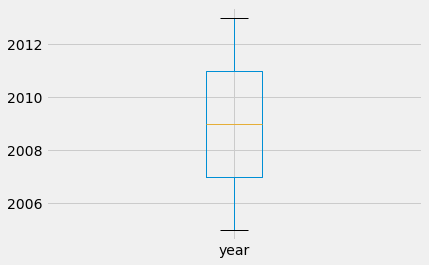

In [9]:
#Plotting the boxplot for the year Column
office_df.boxplot('year')

<AxesSubplot:xlabel='year', ylabel='Votes'>

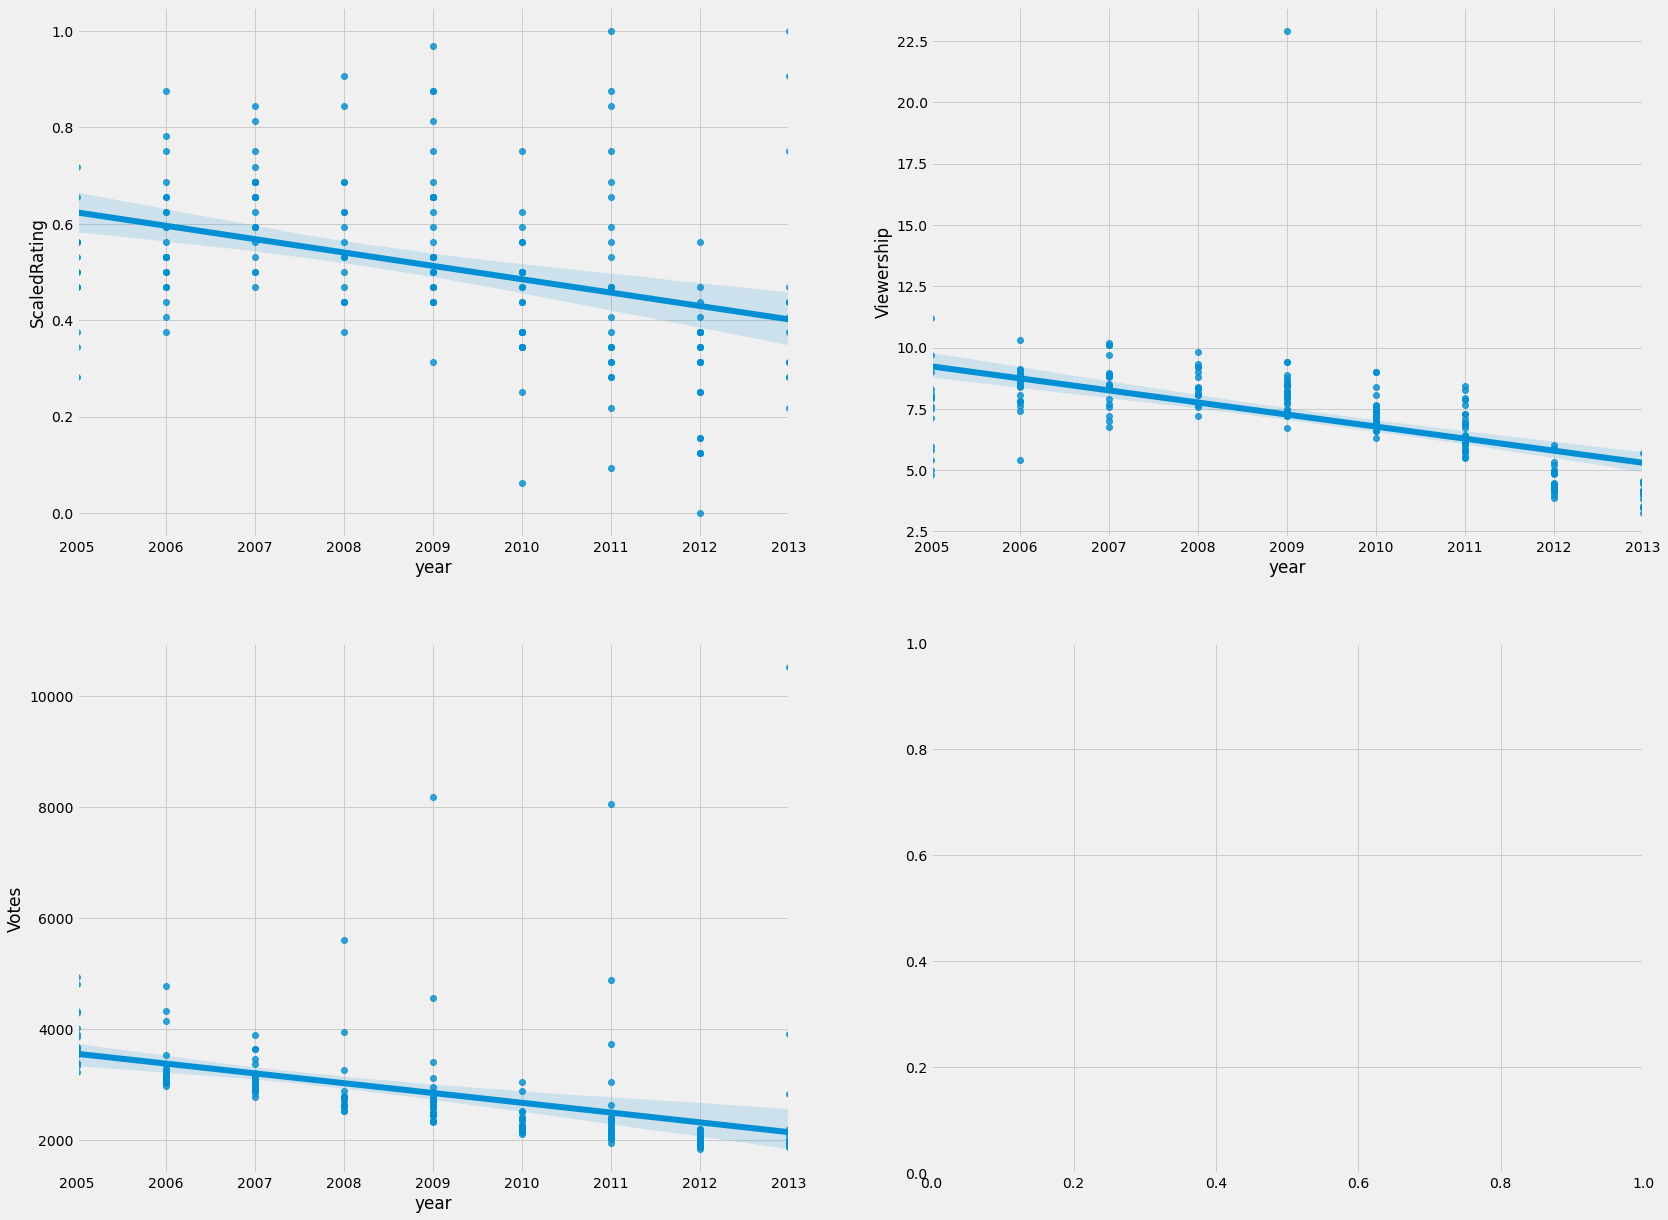

In [10]:
#Regression Plot
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(2, 2, figsize=(25, 20))
sns.regplot(y='ScaledRating',x = 'year', data = office_df, ax=axarr[0][0])
sns.regplot(y='Viewership',x = 'year',  data = office_df , ax=axarr[0][1])
sns.regplot(y='Votes',x = 'year', data = office_df, ax=axarr[1][0])
 